In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import imp
import sys
sys.path.insert(0,'/home/robin/Projects/INM6/elephant')
sys.path.append('/home/robin/Projects/INM6/python-neo')
sys.path.append('/home/robin/Projects/simrest_validation')
sys.path.append('/home/robin/Projects/INM6/Tasks/')
from viziphant.plots.rasterplot import rasterplot
from elephant.spike_train_surrogates import * 
from elephant.statistics import mean_firing_rate, cv, isi
from networkunit import models, tests, scores
from networkunit.plots import alpha
import seaborn as sns
from quantities import Hz, ms
from scipy.linalg import eigh
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())
rc('text', usetex=True)
font_size = 24
text_size = 26

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1359: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Test Networks

In [2]:
size = 100
A_A = [20, 10, 5]
cc_A = [.3, .5, .2]
A_B = [20, 5]
cc_B = [.3, .3]
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms

model_A = models.stochastic_activity(size=size, correlations=cc_A, assembly_sizes=A_A,
                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                shuffle=False, name='A', color=sns.color_palette('Set2')[2])

model_B = models.stochastic_activity(size=size, correlations=cc_B, assembly_sizes=A_B,
                                correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                shuffle=False, name='B', color=sns.color_palette('Set2')[1])
for i in range(sum(A_B)):
    model_B.spiketrains[i].annotations['Assembly'] += 'B'

/usr/local/lib/python2.7/dist-packages/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(other, self)


(<matplotlib.axes._subplots.AxesSubplot at 0x7efdb97b3ed0>,
 <matplotlib.axes._axes.Axes at 0x7efdb8562810>)

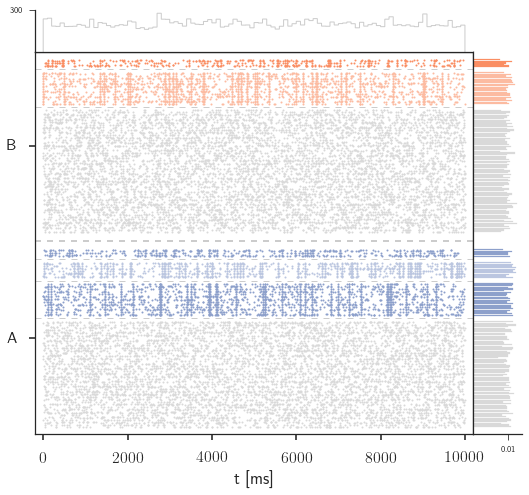

In [3]:
sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
fig.tight_layout()

c_A = model_A.color
c_B = model_B.color
colors = [alpha('#000000',.15)] + [c_A,alpha(c_A,.6),c_A] + [alpha(c_B,.6),c_B]

rasterplot(model_A.spiketrains + model_B.spiketrains, ax=ax, key_list=['Model', 'Assembly'], 
           groupingdepth=2, spacing=[10,3], palette=colors, colorkey='Assembly', pophist_mode='total',
           labelkey=0)

# plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/rasterplot_method_test_data.png')

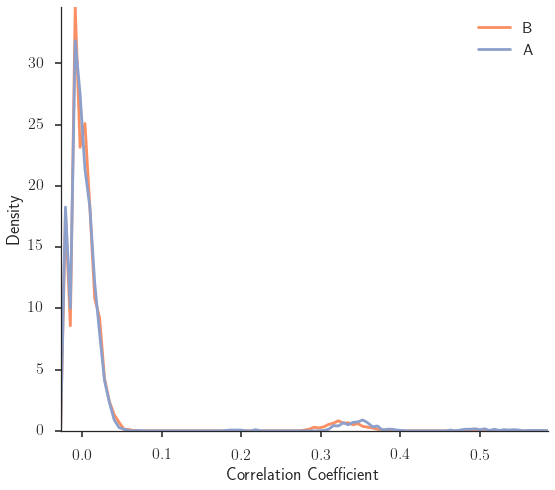

In [4]:
from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(correlation_test, model2model_test):
    score_type = scores.kl_divergence
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}
    
test = m2m_cov_kl_test_2msbins_100sample(model_B)

sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
fig.tight_layout()
sns.despine()

test.visualize_sample(model_A, ax=ax, sample_names=['B','A'], var_name='Correlation Coefficient')

# plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/dist_method_test_data.png')

## Kullback Leibler Divergence

In [5]:
from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(correlation_test, model2model_test):
    score_type = scores.kl_divergence
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}

test = m2m_cov_kl_test_2msbins_100sample(model_A)

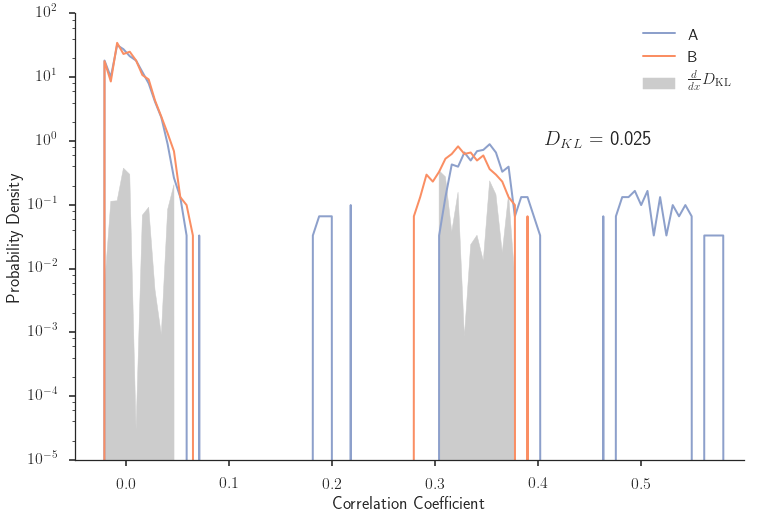

In [6]:
sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
# fig.tight_layout()

test.visualize_score(model=model_B, ax=ax, var_name='Correlation Coefficient', 
                     sample_names=['A','B']);
ax.set_xlim((-.05,.6))
sns.despine()

score = test.judge(model_B)

ax.text(.7, .7, r'$D_{KL}$ = ' + '{:.3f}'.format(score.score), 
        fontsize=20, transform=ax.transAxes)

h, l = ax.get_legend_handles_labels()
ax.legend([h[0],h[1],h[2]], [l[0],l[1],r'$\frac{d}{dx} D_\mathrm{KL}$'])

# plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/DKL_example.png')

## Kolmogorov Smirnov Distance

In [7]:
from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(correlation_test, model2model_test):
    score_type = scores.ks_distance
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}

test = m2m_cov_kl_test_2msbins_100sample(model_A)

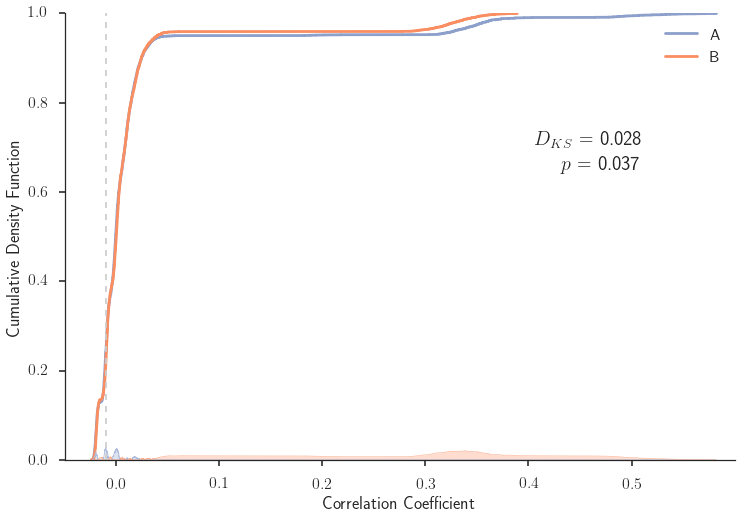

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
# fig.tight_layout()

test.visualize_score(model=model_B, ax=ax, var_name='Correlation Coefficient', 
                     sample_names=['A','B']);
ax.set_xlim((-.05,.6))
sns.despine()

score = test.judge(model_B)

ax.text(.7, .7, r'$D_{KS}$ = ' + '{:.3f}'.format(score.score), 
        fontsize=20, transform=ax.transAxes)
ax.text(.74, .65, r'$p$ = ' + '{:.3f}'.format(score.pvalue), 
        fontsize=20, transform=ax.transAxes)

ax.set_ylabel('Cumulative Density Function')

# plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/DKS_example.png')

## Mann-Whitney U

In [9]:
from networkunit.tests.base_tests import correlation_test, model2model_test

class m2m_cov_kl_test_2msbins_100sample(correlation_test, model2model_test):
    score_type = scores.mwu_statistic
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms}

test = m2m_cov_kl_test_2msbins_100sample(model_A)

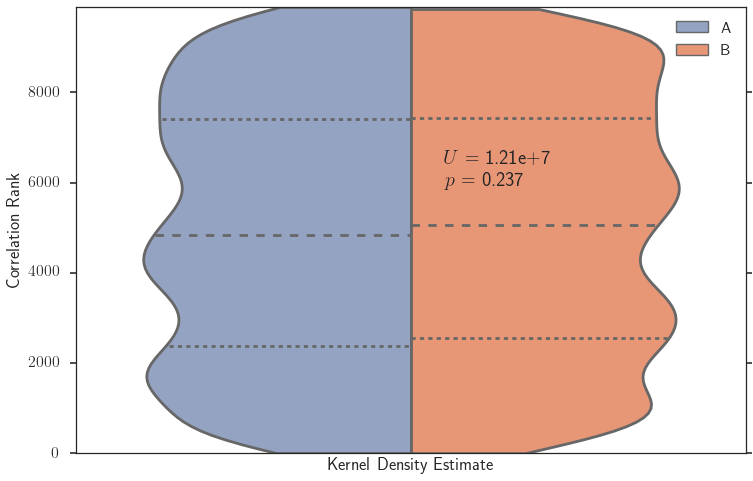

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from networkunit.scores import to_precision

sns.set(style='ticks', palette='Set2', context='poster')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
# fig.tight_layout()

test.visualize_score(model=model_B, ax=ax, var_name='Correlation', 
                     sample_names=['A','B']);

score = test.judge(model_B)

ax.text(.55, .65, r'$U$ = ' + '{}'.format(to_precision(score.score,3)), 
        fontsize=20, transform=ax.transAxes)
ax.text(.55, .6, r'$p$ = ' + '{:.3f}'.format(score.pvalue), 
        fontsize=20, transform=ax.transAxes)

plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/MWU_example.png')